In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings(action = "ignore")
from scipy.stats import f_oneway, chi2_contingency

### Hearts Dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/heart.csv')
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(df1.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
print(df1.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
#Its a classification task

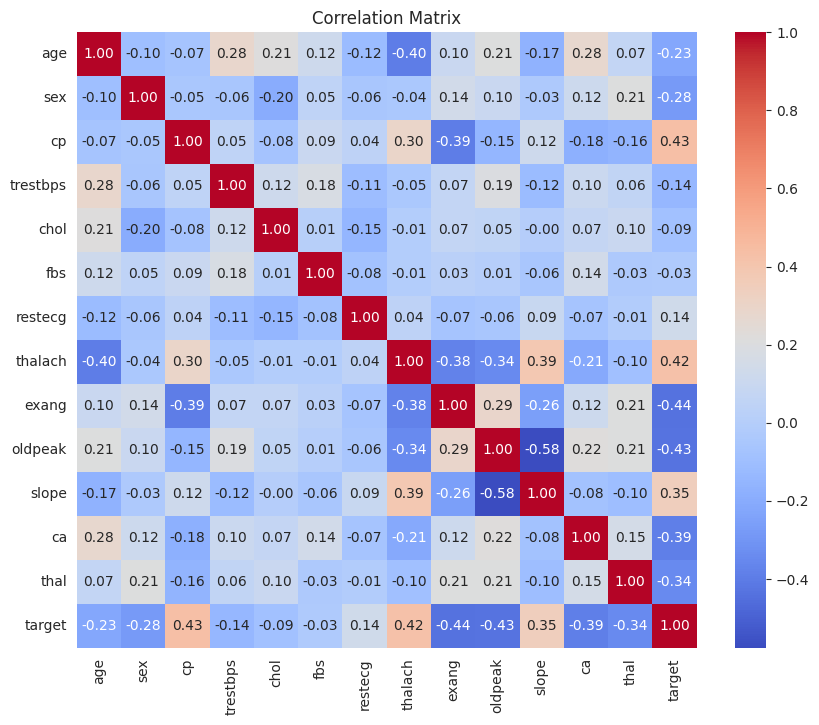

Correlation with Target:
target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64
Top Correlated Features:
Index(['exang', 'cp', 'oldpeak', 'thalach'], dtype='object')
Top Correlated Features DataFrame:
   exang  cp  oldpeak  thalach
0      0   3      2.3      150
1      0   2      3.5      187
2      0   1      1.4      172
3      0   1      0.8      178
4      1   0      0.6      163
(227, 4) (46, 4) (30, 4)
(227,) (46,) (30,)


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Print correlations of all columns with the target variable in descending order
correlation_with_target = correlation_matrix['target'].abs().sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

# Select top correlated features with the target variable 'target'
top_correlated_features = correlation_with_target[1:5].index  # Select top 4 features

print("Top Correlated Features:")
print(top_correlated_features)

# Create a new DataFrame with the top correlated features and the target variable
x_top_correlated = df1[top_correlated_features]
y = df1['target']

print("Top Correlated Features DataFrame:")
print(x_top_correlated.head())

# Now proceed with the train-test-validation split
x_train, x_temp, y_train, y_temp = train_test_split(x_top_correlated, y, test_size=0.25, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)

print(x_train.shape, x_test.shape, x_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)


In [ ]:
#Scaling the features
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)


In [ ]:
#Function for evaluation
def evaluate(model, model_name, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, x_valid=x_valid):
    print(f"Model performance for {model_name}")
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_valid_pred = model.predict(x_valid)

    # Confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)
    plt.title('Confusion Matrix')
    plt.show()

    # Precision score
    precision_score_train = precision_score(y_train, y_train_pred)
    precision_score_test = precision_score(y_test, y_test_pred)
    precision_score_valid = precision_score(y_valid, y_valid_pred)

    # Recall score
    recall_score_train = recall_score(y_train, y_train_pred)
    recall_score_test = recall_score(y_test, y_test_pred)
    recall_score_valid = recall_score(y_valid, y_valid_pred)

    # F1 score
    f1_score_train = f1_score(y_train, y_train_pred)
    f1_score_test = f1_score(y_test, y_test_pred)
    f1_score_valid = f1_score(y_valid, y_valid_pred)

    # Accuracy score
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    accuracy_score_valid = accuracy_score(y_valid, y_valid_pred)

    print("Precision Score Train:", precision_score_train)
    print("Precision Score Test:", precision_score_test)
    print("Precision Score Validation:", precision_score_valid)

    print("Recall Score Train:", recall_score_train)
    print("Recall Score Test:", recall_score_test)
    print("Recall Score Validation:", recall_score_valid)

    print("F1 Score Train:", f1_score_train)
    print("F1 Score Test:", f1_score_test)
    print("F1 Score Validation:", f1_score_valid)

    print("Accuracy Score Train:", accuracy_score_train)
    print("Accuracy Score Test:", accuracy_score_test)
    print("Accuracy Score Validation:", accuracy_score_valid)

    return (
        precision_score_train, precision_score_test, precision_score_valid,
        recall_score_train, recall_score_test, recall_score_valid,
        f1_score_train, f1_score_test, f1_score_valid,
        accuracy_score_train, accuracy_score_test, accuracy_score_valid
    )


Model performance for LogisticRegression()


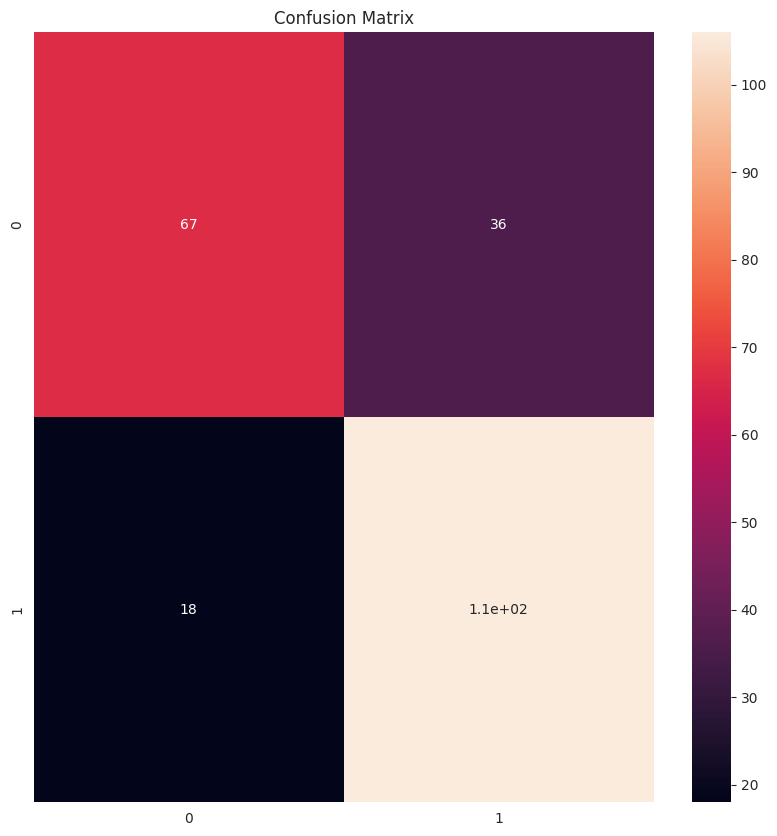

Precision Score Train: 0.7464788732394366
Precision Score Test: 0.9047619047619048
Precision Score Validation: 0.8
Recall Score Train: 0.8548387096774194
Recall Score Test: 0.8260869565217391
Recall Score Validation: 0.8888888888888888
F1 Score Train: 0.7969924812030075
F1 Score Test: 0.8636363636363636
F1 Score Validation: 0.8421052631578948
Accuracy Score Train: 0.762114537444934
Accuracy Score Test: 0.8695652173913043
Accuracy Score Validation: 0.8


In [ ]:
#Implementing Logistic Regression using Sklearn
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)
LR = evaluate(clf1,clf1)

Model performance for Manual Logistic Regression


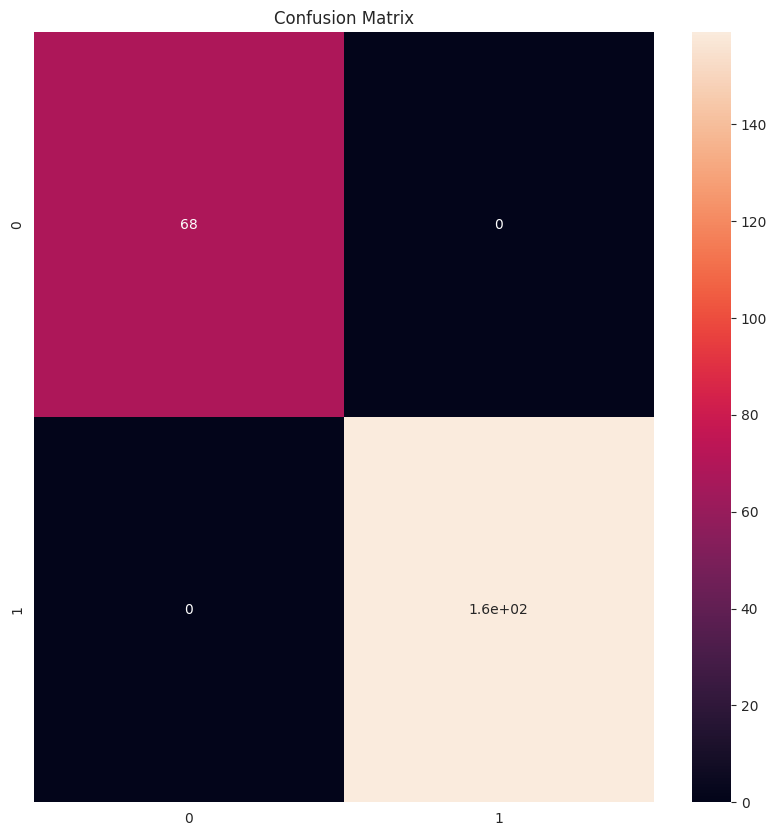

Precision Score Train: 1.0
Precision Score Test: 1.0
Precision Score Validation: 0.7272727272727273
Recall Score Train: 1.0
Recall Score Test: 1.0
Recall Score Validation: 0.8888888888888888
F1 Score Train: 1.0
F1 Score Test: 1.0
F1 Score Validation: 0.7999999999999999
Accuracy Score Train: 1.0
Accuracy Score Test: 1.0
Accuracy Score Validation: 0.7333333333333333


In [ ]:
#Implementing model manually
class Logistic_Regression():
    def __init__(self, learning_rate, no_of_iterations, lmbda):
        # Initialize hyperparameters
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lmbda = lmbda

    def fit(self, X, Y):
        # Get dimensions of the input data
        self.m, self.n = X.shape
        # Initialize weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        # Save input data for future use
        self.X = X
        self.Y = Y
        # Update weights for a given number of iterations
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        # Calculate predicted values
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
        # Calculate gradients of weights and bias
        dw = (1/self.m) * np.dot(self.X.T, (Y_hat - self.Y)) + (self.lmbda/self.m) * self.w
        db = (1/self.m) * np.sum(Y_hat - self.Y)
        # Update weights and bias using gradients and learning rate
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        # Calculate predicted values for new data
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        # Convert predicted values to binary class labels
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred

learning_rate = 0.01
no_of_iterations = 1000
lmbda = 0.01

# Create an instance of the Logistic_Regression class
log_reg = Logistic_Regression(learning_rate, no_of_iterations, lmbda)

# Fit the model to the training data
log_reg.fit(x_train, y_train)

# Predictions on training, testing, and validation data
train_preds_manual = log_reg.predict(x_train)
test_preds_manual = log_reg.predict(x_test)
valid_preds_manual = log_reg.predict(x_valid)

# Evaluate the manually implemented logistic regression model
manual_results = evaluate(log_reg, "Manual Logistic Regression", x_train, train_preds_manual, x_test, test_preds_manual, x_valid)


Comparision : The Sklearn Logistic Regression model demonstrates a better balance between fitting and generalization, leading to more consistent performance across datasets. The manual model's perfect scores on the training set(precision, recall, F1, and accuracy scores of 1.0) indicate overfitting, and its performance drop on the validation set hints at underfitting. The Sklearn model is the preferred choice, as it shows more robust generalization and reliable performance across different data subsets(unseen data).


### House Price Prediction Dataset

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/HousePricePrediction.csv')
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df2.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
mean_lotfrontage = df2['LotFrontage'].mean()
df2['LotFrontage'].fillna(mean_lotfrontage, inplace=True)

# Now your "LotFrontage" column should have no null values
print(df2['LotFrontage'].isnull().sum())

0


In [ ]:
print(df2.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
# Numeric Features for ANOVA
numeric_features = df2.select_dtypes(include=np.number)

# Categorical Features for Chi-Square
categorical_features = df2.select_dtypes(include='object')

# List to store ANOVA and Chi-Square results
anova_results = []
chi2_results = []

# Perform ANOVA for numeric features
for feature in numeric_features.columns:
    anova_result = f_oneway(*[group[feature].dropna() for name, group in df2.groupby('SalePrice')])  # Assuming 'SalePrice' is the target variable
    anova_results.append((feature, anova_result.statistic, anova_result.pvalue))

# Perform Chi-Square for categorical features
for feature in categorical_features.columns:
    contingency_table = pd.crosstab(df2[feature], df2['SalePrice'])
    chi2_result = chi2_contingency(contingency_table)
    chi2_results.append((feature, chi2_result[0], chi2_result[1]))

# Convert results to dataframes for sorting
anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F_Statistic', 'P_Value']).sort_values(by='F_Statistic', ascending=False)
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2_Statistic', 'P_Value']).sort_values(by='Chi2_Statistic', ascending=False)

# Select top 5 positively correlated numeric features from ANOVA
top_numeric_features = anova_df[anova_df['P_Value'] < 0.05].head(6)['Feature'].tolist()

# Select top 5 positively correlated categorical features from Chi-Square
top_categorical_features = chi2_df[chi2_df['P_Value'] < 0.05].head(5)['Feature'].tolist()

# Combine the selected top numeric and categorical features
selected_features = top_numeric_features + top_categorical_features

# Update df2 to contain only the selected features
df2 = df2[selected_features]

# Display the updated df2
print(df2.head())


   SalePrice  OverallQual  MiscVal  GrLivArea  LotArea  GarageCars  \
0     208500            7        0       1710     8450           2   
1     181500            6        0       1262     9600           2   
2     223500            7        0       1786    11250           2   
3     140000            7        0       1717     9550           3   
4     250000            8        0       2198    14260           3   

  Neighborhood SaleType Heating SaleCondition Foundation  
0      CollgCr       WD    GasA        Normal      PConc  
1      Veenker       WD    GasA        Normal     CBlock  
2      CollgCr       WD    GasA        Normal      PConc  
3      Crawfor       WD    GasA       Abnorml     BrkTil  
4      NoRidge       WD    GasA        Normal      PConc  


In [ ]:
print(df2.dtypes)


SalePrice         int64
OverallQual       int64
MiscVal           int64
GrLivArea         int64
LotArea           int64
GarageCars        int64
Neighborhood     object
SaleType         object
Heating          object
SaleCondition    object
Foundation       object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Copy the df2 DataFrame to avoid modifying the original data
df2_encoded = df2.copy()

# List to store columns that need one-hot encoding
one_hot_cols = []

# Iterate through columns for encoding
for col in df2_encoded.columns:
    if np.issubdtype(df2_encoded[col].dtypes, np.object):
        if df2_encoded[col].nunique() == 2:
            # Perform label encoding for binary categorical features
            le = LabelEncoder()
            df2_encoded[col] = le.fit_transform(df2_encoded[col])
        else:
            # Perform one-hot encoding for categorical features with more than two categories
            one_hot_cols.append(col)

# Perform one-hot encoding for selected columns
df2_encoded = pd.get_dummies(df2_encoded, columns=one_hot_cols, prefix=one_hot_cols, drop_first=True)

# Display the encoded df2 DataFrame
print(df2_encoded.head())


   SalePrice  OverallQual  MiscVal  GrLivArea  LotArea  GarageCars  \
0     208500            7        0       1710     8450           2   
1     181500            6        0       1262     9600           2   
2     223500            7        0       1786    11250           2   
3     140000            7        0       1717     9550           3   
4     250000            8        0       2198    14260           3   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  ...  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                     0  ...                      0                     0   
1   

In [ ]:
df2=df2_encoded
print(df2_encoded.head())

   SalePrice  OverallQual  MiscVal  GrLivArea  LotArea  GarageCars  \
0     208500            7        0       1710     8450           2   
1     181500            6        0       1262     9600           2   
2     223500            7        0       1786    11250           2   
3     140000            7        0       1717     9550           3   
4     250000            8        0       2198    14260           3   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  ...  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                     0  ...                      0                     0   
1   

In [ ]:
# Splitting the data
x = df2_encoded.drop('SalePrice', axis=1)
y = df2_encoded['SalePrice']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)

# Scaling the data
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(model, model_name, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, x_valid=x_valid, y_valid=y_valid):
    print(f"Model performance for {model_name}")

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_valid_pred = model.predict(x_valid)

    # Evaluation metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    rmse_valid = np.sqrt(mse_valid)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)

    print("Mean Absolute Error Train:", mae_train)
    print("Mean Absolute Error Test:", mae_test)
    print("Mean Absolute Error Validation:", mae_valid)

    print("Mean Squared Error Train:", mse_train)
    print("Mean Squared Error Test:", mse_test)
    print("Mean Squared Error Validation:", mse_valid)

    print("Root Mean Squared Error Train:", rmse_train)
    print("Root Mean Squared Error Test:", rmse_test)
    print("Root Mean Squared Error Validation:", rmse_valid)

    print("R2 Score Train:", r2_train)
    print("R2 Score Test:", r2_test)
    print("R2 Score Validation:", r2_valid)

    return mae_train, mae_test, mae_valid, mse_train, mse_test, mse_valid, rmse_train, rmse_test, rmse_valid, r2_train, r2_test, r2_valid


In [ ]:
# Implement the LinearRegression model using Sklearn
clf_linear = LinearRegression()

# Train the LinearRegression model
clf_linear.fit(x_train, y_train)

# Evaluate the LinearRegression model using your evaluate function
evaluate_regression(clf_linear, "Linear Regression")

Model performance for Linear Regression
Mean Absolute Error Train: 22069.027005753054
Mean Absolute Error Test: 23977.139785001615
Mean Absolute Error Validation: 21635.696807711825
Mean Squared Error Train: 1171786504.5066376
Mean Squared Error Test: 1542337977.7235646
Mean Squared Error Validation: 845323201.524621
Root Mean Squared Error Train: 34231.367260257626
Root Mean Squared Error Test: 39272.611037764786
Root Mean Squared Error Validation: 29074.44241124189
R2 Score Train: 0.8070003962330857
R2 Score Test: 0.7914223307780899
R2 Score Validation: 0.865873163469524


(22069.027005753054,
 23977.139785001615,
 21635.696807711825,
 1171786504.5066376,
 1542337977.7235646,
 845323201.524621,
 34231.367260257626,
 39272.611037764786,
 29074.44241124189,
 0.8070003962330857,
 0.7914223307780899,
 0.865873163469524)

In [ ]:
#Using Manual Gradient Descent

class Linear_Regression():

    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

    def mean_absolute_error(self, y_true, y_pred):
        return np.mean(np.abs(y_pred - y_true))

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_pred - y_true) ** 2)

    def root_mean_squared_error(self, y_true, y_pred):
        return np.sqrt(np.mean((y_pred - y_true) ** 2))

    def r2_score(self, y_true, y_pred):
        numerator = np.sum((y_pred - y_true.mean()) ** 2)
        denominator = np.sum((y_true - y_true.mean()) ** 2)
        r2 = 1 - (numerator / denominator)
        return r2

    def evaluate(self, x_train, y_train, x_test, y_test, x_valid, y_valid):
        y_train_pred = self.predict(x_train)
        y_test_pred = self.predict(x_test)
        y_valid_pred = self.predict(x_valid)

        mae_train = self.mean_absolute_error(y_train, y_train_pred)
        mae_test = self.mean_absolute_error(y_test, y_test_pred)
        mae_valid = self.mean_absolute_error(y_valid, y_valid_pred)

        mse_train = self.mean_squared_error(y_train, y_train_pred)
        mse_test = self.mean_squared_error(y_test, y_test_pred)
        mse_valid = self.mean_squared_error(y_valid, y_valid_pred)

        rmse_train = self.root_mean_squared_error(y_train, y_train_pred)
        rmse_test = self.root_mean_squared_error(y_test, y_test_pred)
        rmse_valid = self.root_mean_squared_error(y_valid, y_valid_pred)

        r2_train = self.r2_score(y_train, y_train_pred)
        r2_test = self.r2_score(y_test, y_test_pred)
        r2_valid = self.r2_score(y_valid, y_valid_pred)

        print("Mean Absolute Error Train:", mae_train)
        print("Mean Absolute Error Test:", mae_test)
        print("Mean Absolute Error Validation:", mae_valid)

        print("Mean Squared Error Train:", mse_train)
        print("Mean Squared Error Test:", mse_test)
        print("Mean Squared Error Validation:", mse_valid)

        print("Root Mean Squared Error Train:", rmse_train)
        print("Root Mean Squared Error Test:", rmse_test)
        print("Root Mean Squared Error Validation:", rmse_valid)

        print("R2 Score Train:", r2_train)
        print("R2 Score Test:", r2_test)
        print("R2 Score Validation:", r2_valid)


# Create Linear Regression object
lr_model = Linear_Regression(learning_rate=0.001, no_of_iterations=1000)

# Fit the model to your data
lr_model.fit(x_train_scaled, y_train)

# Evaluate the model
lr_model.evaluate(x_train_scaled, y_train, x_test_scaled, y_test, x_valid_scaled, y_valid)


Mean Absolute Error Train: 41242.19069637328
Mean Absolute Error Test: 40635.15806345414
Mean Absolute Error Validation: 44130.87578878848
Mean Squared Error Train: 3642481620.210044
Mean Squared Error Test: 4423420777.303266
Mean Squared Error Validation: 3657137572.074598
Root Mean Squared Error Train: 60352.97523908862
Root Mean Squared Error Test: 66508.80225431267
Root Mean Squared Error Validation: 60474.2719846597
R2 Score Train: 0.8277889159977414
R2 Score Test: 0.8504530567986128
R2 Score Validation: 0.8167150215778757


Conclusion :

The Sklearn Linear Regression model consistently performs better in terms of all three error metrics (MAE, MSE, and RMSE) across all three datasets (Train, Test, and Validation). The manual gradient descent model has higher error values, indicating that it is less accurate in predicting the target variable. Sklearn Linear Regression model has higher R2 scores for all three datasets, suggesting that it explains more of the variance in the target variable compared to the manual gradient descent model.


The relatively consistent performance across train, test, and validation sets indicates that the Sklearn Linear Regression model is likely not suffering from overfitting or underfitting. The manual gradient descent model shows signs of overfitting. The model performs well on the training set (high R2), but its performance deteriorates on the test and validation sets.


Just as we saw in the previous case, even here too, Sklearn Library works better than manual gradient descent and manual gradient descent is prone to overfitting and less generatization of data